# Challenge: Advanced Regression


#### Source: 
I choose a dataset from kaggle on Austin Texas's Animal Shelter, the largest no-kill animal shelter in the US, to predict whether an animal at intake will likely be adopted or have to be transfered elsewhere. 

https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes#aac_intakes_outcomes.csv

In [495]:
#imports
import pandas as pd
import numpy as np
import math

#plotting
from matplotlib import pyplot as pl
import seaborn as sns
%matplotlib inline
sns.set_style('white')

#models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [496]:
#read in data
df = pd.read_csv('https://www.dropbox.com/s/i613e1l09n5dhp7/aac_intakes_outcomes.csv?dl=1')
#drop unnecessary columns 
df = df.drop(['animal_id_outcome','count','age_upon_outcome_age_group','outcome_subtype','age_upon_intake_age_group','animal_id_intake', 'color', 'found_location','breed','time_in_shelter','date_of_birth','dob_monthyear','outcome_monthyear','intake_monthyear' ], axis = 1)
df.head(10)

,age_upon_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_month,outcome_year,outcome_weekday,outcome_hour,...,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_month,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter_days
0,10 years,Return to Owner,Neutered Male,3650,10.0,2017-12-07 14:07:00,12,2017,Thursday,0,...,Neutered Male,3650,10.0,2017-12-07 00:00:00,12,2017,Thursday,14,1.0,0.588194
1,7 years,Return to Owner,Neutered Male,2555,7.0,2014-12-20 16:35:00,12,2014,Saturday,16,...,Neutered Male,2555,7.0,2014-12-19 10:21:00,12,2014,Friday,10,2.0,1.259722
2,6 years,Return to Owner,Neutered Male,2190,6.0,2014-03-08 17:10:00,3,2014,Saturday,17,...,Neutered Male,2190,6.0,2014-03-07 14:26:00,3,2014,Friday,14,3.0,1.113889
3,10 years,Transfer,Neutered Male,3650,10.0,2014-04-07 15:12:00,4,2014,Monday,15,...,Neutered Male,3650,10.0,2014-04-02 15:55:00,4,2014,Wednesday,15,1.0,4.970139
4,16 years,Return to Owner,Neutered Male,5840,16.0,2013-11-16 11:54:00,11,2013,Saturday,11,...,Neutered Male,5840,16.0,2013-11-16 09:02:00,11,2013,Saturday,9,1.0,0.119444
5,15 years,Return to Owner,Spayed Female,5475,15.0,2013-11-17 11:40:00,11,2013,Sunday,11,...,Spayed Female,5475,15.0,2013-11-16 14:46:00,11,2013,Saturday,14,1.0,0.870833
6,15 years,Return to Owner,Intact Female,5475,15.0,2014-11-14 19:28:00,11,2014,Friday,19,...,Intact Female,5475,15.0,2014-11-14 15:11:00,11,2014,Friday,15,1.0,0.178472
7,15 years,Return to Owner,Neutered Male,5475,15.0,2014-09-15 16:35:00,9,2014,Monday,16,...,Neutered Male,5475,15.0,2014-09-15 11:28:00,9,2014,Monday,11,1.0,0.213194
8,15 years,Return to Owner,Neutered Male,5475,15.0,2014-03-23 15:57:00,3,2014,Sunday,15,...,Neutered Male,5475,15.0,2014-03-17 09:45:00,3,2014,Monday,9,1.0,6.258333
9,18 years,Return to Owner,Spayed Female,6570,18.0,2015-09-18 19:04:00,9,2015,Friday,19,...,Spayed Female,6570,18.0,2015-09-18 17:46:00,9,2015,Friday,17,1.0,0.054167


In [497]:
df.describe()

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 27 columns):
age_upon_outcome            79672 non-null object
outcome_type                79662 non-null object
sex_upon_outcome            79671 non-null object
age_upon_outcome_(days)     79672 non-null int64
age_upon_outcome_(years)    79672 non-null float64
outcome_datetime            79672 non-null object
outcome_month               79672 non-null int64
outcome_year                79672 non-null int64
outcome_weekday             79672 non-null object
outcome_hour                79672 non-null int64
outcome_number              79672 non-null float64
dob_year                    79672 non-null int64
dob_month                   79672 non-null int64
age_upon_intake             79672 non-null object
animal_type                 79672 non-null object
intake_condition            79672 non-null object
intake_type                 79672 non-null object
sex_upon_intake             79671 non-null ob

In [499]:
#Limit the outcome types for adoption/transfer for prediction 
df_adopt = df.loc[((df['outcome_type'] == 'Transfer')  | (df['outcome_type'] == 'Adoption'))]

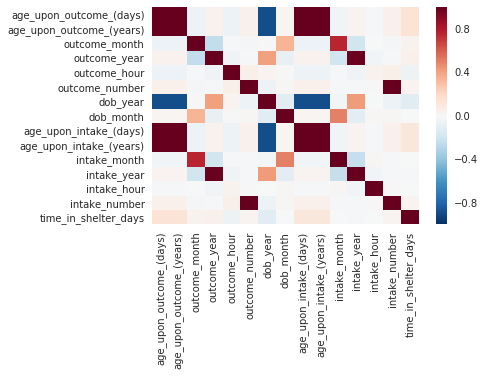

In [500]:
#create correlation matrix
sns.heatmap(df_adopt.corr())

In [501]:
#drop some of the heavily corrleated variables
df_adopt = df_adopt.drop(['age_upon_outcome', 'age_upon_outcome_(years)','outcome_number','outcome_year', 'age_upon_intake_(years)', 'outcome_datetime','intake_datetime', 'dob_year'], axis = 1)

### Feature Engineering

In [502]:
#create values for the categorical variables
outcome_weekday_values = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,'Friday':5,'Saturday':6} 
df_adopt.replace({'outcome_weekday':outcome_weekday_values}, inplace=True)
sex_upon_outcome_values = {'Unknown':0, 'Neutered Male':1, 'Spayed Female':2, 'Intact Female':3, 'Intact Male':4}
df_adopt.replace({'sex_upon_outcome':sex_upon_outcome_values}, inplace = True) 
animal_type_values = {'Other':0,'Bird':1,'Cat':2, 'Dog':3}
df_adopt.replace({'animal_type':animal_type_values}, inplace = True) 
intake_condition_values = {'Normal':0,'Sick':1,'Aged':2, 'Feral':3,'Nursing':4, 'Injured':5, 'Pregnant':6, 'Other':7}
df_adopt.replace({'intake_condition': intake_condition_values}, inplace = True)
intake_type_values ={'Owner Surrender':0, 'Public Assist': 1, 'Stray':2, 'Wildlife':3,'Euthanasia Request':4}
df_adopt.replace({'intake_type': intake_type_values}, inplace = True)
intake_weekday_values = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,'Friday':5,'Saturday':6} 
df_adopt.replace({'intake_weekday':intake_weekday_values}, inplace=True)
sex_upon_intake_values =  {'Unknown':0, 'Neutered Male':1, 'Spayed Female':2, 'Intact Female':3, 'Intact Male':4}
df_adopt.replace({'sex_upon_intake':sex_upon_intake_values}, inplace = True) 

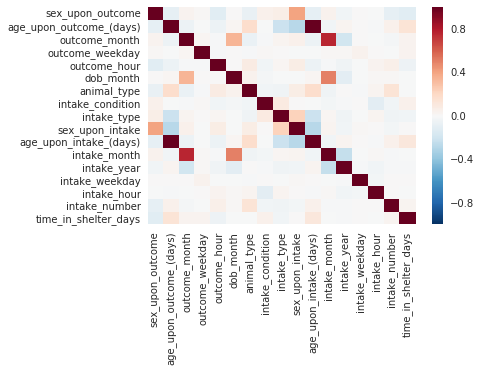

In [503]:
#run another correlation matrix with the newly created features 
sns.heatmap(df_adopt.corr())

In [504]:
#create the binary prediction outcomes
outcome_type_values = {'Transfer':0, 'Adoption':1}
df_adopt.replace({'outcome_type':outcome_type_values}, inplace = True)

In [505]:
#clean data to fit model
df_adopt.replace('NaN', np.nan) 
df_adopt['age_upon_intake'] = df_adopt.age_upon_intake.str.extract('(\d+)', expand=True).astype(int)
df_adopt.fillna(0, inplace=True)
for col in df_adopt.iloc[:, 1:]:
    df_adopt[col] = df_adopt[col].replace('[^0-9]+', '', regex=True)

In [506]:
#Let's remove any outcome variables, we'll want to know what the likelyhood of that animal getting adopted would be over transfered at time of intake 
df_adopt = df_adopt.drop(['sex_upon_outcome','age_upon_outcome_(days)', 'outcome_month','outcome_weekday','outcome_hour'], axis = 1)

## Vanilla Logistic Regression

In [507]:
#create training/test sets
X = df_adopt.drop('outcome_type', axis=1)
Y = df_adopt['outcome_type']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

##### Fitting a binary logistic model using statsmodels

In [508]:
#declare predictors
X_statsmod = X_train.copy()

#the statsmodels formulation requires a column with constant value 1 that
#will act as the intercept.
X_statsmod['intercept'] = 1 

#declare and fit the model.
logit = sm.Logit(Y_train, X_statsmod)
result = logit.fit()

#lots of information about the model and its coefficients, but the
#accuracy rate for predictions is missing.
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.564132
         Iterations 8
                               Results: Logit
Model:                  Logit                No. Iterations:       8.0000    
Dependent Variable:     outcome_type         Pseudo R-squared:     0.168     
Date:                   2018-12-13 18:41     AIC:                  45356.0338
No. Observations:       40175                BIC:                  45476.4478
Df Model:               13                   Log-Likelihood:       -22664.   
Df Residuals:           40161                LL-Null:              -27246.   
Converged:              1.0000               Scale:                1.0000    
-----------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------
dob_month                -0.0041   0.0041  -1.0024 0.3162   -0.0120    0

##### Fitting a binary logistic model using sklearn 

In [509]:
#declare a logistic regression classifier
lr = LogisticRegression()
Y = Y_train
X = X_train

#fit the model.
fit = lr.fit(X, Y)

#display
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

#print confusion matrix 
print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y))

#print accuracy score
print('\n Percentage accuracy')
print(lr.score(X_test, Y_test))

#perform cross validation 
print('\n Cross Validation Scores')
print(cross_val_score(lr, X_test, Y_test, cv=10))

Coefficients
[[-3.08544550e-03  1.08778429e-02  8.11096237e-01 -2.37880169e-01
  -2.28237625e-01  1.83920999e-01 -1.54483016e-04 -1.55635846e-02
  -1.81076689e-03  1.15350387e-02 -2.38494418e-03  1.39031922e+00
   3.73964088e-02]]
[-0.00494744]

 Accuracy
outcome_type     0      1
row_0                    
0             9607   4070
1             7013  19485

 Percentage accuracy
0.7202927169241492

 Cross Validation Scores
[0.73054588 0.71835075 0.72706156 0.71893148 0.71138211 0.72067364
 0.70847851 0.72880372 0.71660859 0.73837209]


## Ridge Logistic Regression

In [510]:
#initiate the ridge model through the pentalty l2 
ridgemodel = LogisticRegression(penalty='l2')
ridgefit = ridgemodel.fit(X_train, Y_train)

In [511]:
ridgemodel.score(X_test, Y_test)

0.7202927169241492

In [512]:
#metrics
pred_y_sklearn = ridgemodel.predict(X_test)

#confusion matrix
print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y_test))

#accuracy score
print('\n Percentage accuracy')
print(ridgemodel.score(X_test, Y_test))

#cross validation 
print('\n Cross Validation Scores')
print(cross_val_score(ridgemodel, X_test, Y_test, cv=10))


 Accuracy
outcome_type     0     1
row_0                   
0             4137  1774
1             3042  8265

 Percentage accuracy
0.7202927169241492

 Cross Validation Scores
[0.73054588 0.71835075 0.72706156 0.71893148 0.71138211 0.72067364
 0.70847851 0.72880372 0.71660859 0.73837209]


## Lasso Logistic Regression

In [513]:
#initial the Lasso model through the pentalty l1 
lassomodel = LogisticRegression(penalty='l1')
lassomodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [514]:
lassomodel.score(X_test, Y_test)

0.7201765594145662

In [515]:
#=metrics
pred_y_sklearn = lassomodel.predict(X_test)

#confusion matrix. 
print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y_test))

#accuracy Score
print('\n Percentage accuracy')
print(lassomodel.score(X_test, Y_test))

#cross validation 
print('\n Cross Validation Scores')
print(cross_val_score(lassomodel, X_test, Y_test, cv=10))


 Accuracy
outcome_type     0     1
row_0                   
0             4137  1776
1             3042  8263

 Percentage accuracy
0.7201765594145662

 Cross Validation Scores
[0.7311266  0.71544715 0.72706156 0.71893148 0.71022067 0.7195122
 0.71022067 0.72880372 0.71602787 0.73546512]


## Conclusion 

In Summation: 

Logistic Regression Percentage Accuracy: 0.7235096453018046 

Ridge Logistic Regression Percentage Accuracy: 0.723312812173307

Lasso Logistic Regression Percentage Accuracy: 0.7234289696828899

Our logistic regression model performed better by around .0002, so very minimally better than the ridge and logistic regression. We have low multicolinearity in this model, and most variables appear useful, thus, I would stick with the logistic regression for not only simplicity, but better performance. 